#Projeto 2 - Wallmart

###Grupo: DEX3 - G3
RID: 5362 - Pollyane Rodrigues Fernandes - Product Owner

RID: 7576 - Rafael Dos Santos Geonmonond - Scrum Master

RID: 1587 - Danyelle De Barros Benatti - Dev Team

RID: 4692 - Marcelo Reis dos Santos - Dev Team

RID: 13302 - Lucas Alexandre Barbosa De Oliveira Santos - Dev Team

RID: 7645 - Letícia Campos Valente - Dev Team

RID: 7221 - Tamara Dos Anjos - Dev Team




### Business Understanding
Fomos consultados pelo **Wallmart** para fazer um levantamento do faturamento das lojas nos USA (entre 2010 e 2012) e apontar qual loja seria melhor para **expandir seu tamanho.** 

É preciso analisar as vendas semanais de cada loja, calcular algumas informações importantes que serão perguntadas e ao final de tudo, **indicar em qual loja deve ser feito o investimento (Loja mais promissora).**

## 0. Bibliotecas utilizadas (requirements)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from google.colab import files
from datetime import datetime

## 1. Importação dos dados

In [ ]:
uploaded = files.upload()
df = pd.read_csv('Walmart.csv', parse_dates=['Date'])

Saving Walmart.csv to Walmart.csv


## 2. Análise inicial dos dados

#### 2.1. Nº de linhas e colunas

In [ ]:
df.shape

(6435, 8)

#### 2.2. Nome das colunas, contagem de nulos e dtypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


#### 2.3. Medidas estatísticas descritivas

In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


#### 2.4. Distribuição dos dados de cada loja

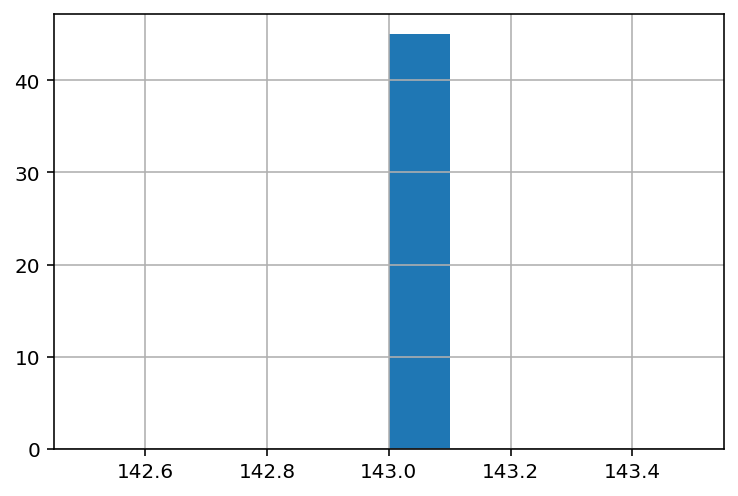

In [ ]:
df_counts = df['Store'].value_counts().rename_axis('Loja').reset_index(level=0)
df_counts.rename(columns={"Store": "Frequência"}, inplace=True)
df_counts['Frequência'].hist();

Vê se que a frequência dos dados de lojas é uniforme, indicando um sampling dataframe não enviesado. 

O gráfico revela que todas as lojas possuem dados de 143 semanas.

#### 2.4. Visão geral das 10 primeiras linhas

In [ ]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808


### 3. Insight 1: "Qual o preço médio de venda semanal por loja?"

In [ ]:
#Número médio de vendas semanais por loja
df_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
df_store.sort_values(by=['Weekly_Sales'], inplace=True, ascending=False)


def decimal_notation(rowval):
  return np.around((rowval/(10**6)), decimals=2)

df_store['Weekly_Sales(mil USD)'] = df_store['Weekly_Sales'].apply(decimal_notation)
df_store = df_store.reset_index(drop=True)
df_store

,Store,Weekly_Sales,Weekly_Sales(mil USD)
0,20,2.107677e+06,2.11
1,4,2.094713e+06,2.09
2,14,2.020978e+06,2.02
3,13,2.003620e+06,2.00
4,2,1.925751e+06,1.93
5,10,1.899425e+06,1.90
6,27,1.775216e+06,1.78
7,6,1.564728e+06,1.56
8,1,1.555264e+06,1.56
9,39,1.450668e+06,1.45


### 4. Insight 2: "Qual atributo que tem maior correlação (positiva ou negativa com o número de vendas? (E que faça sentido)"

#### 4.1 Matriz de correlação de Pearson

A matriz de correlação de Pearson abrange valores entre 1 e -1. Quanto mais próximo de zero o valor estiver menor é sua correlaçao. Nessa matriz n na diagonal os valores serão 1 e ela possui os valores espelhados na sua diagonal.

In [ ]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


Como a matriz se espelha na sua diagonal, podemos visualizar as correlações em metade de sua visualização original

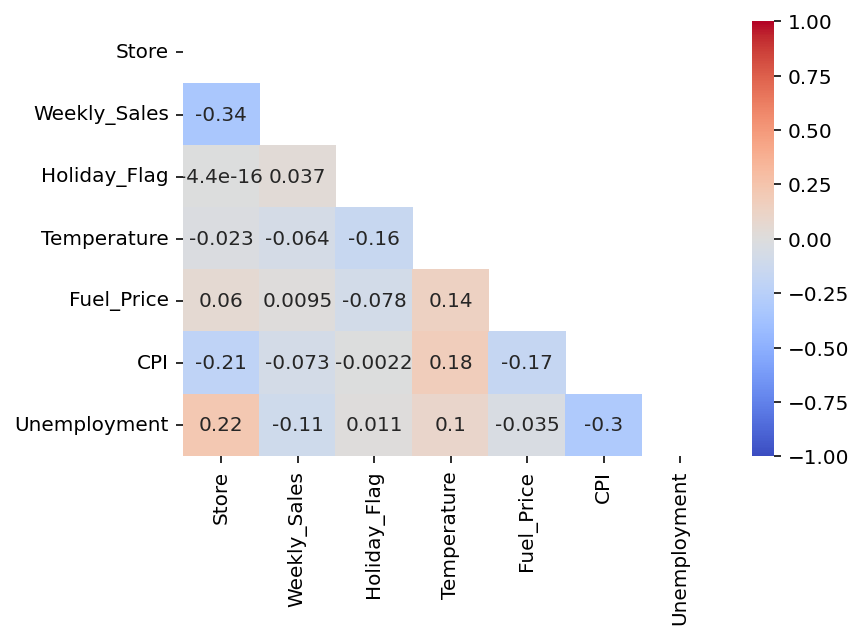

In [ ]:
mask= np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, cmap='coolwarm', mask = mask);

#### * *Resposta*: O atributo que possui maior correlação com as vendas é o **Unenployment** (Tirando a Store que não faz sentido)

### 5. Insight 3: Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ela ultrapassou a média do período?

#### 5.1 Visualização da loja com maior venda acumulada

In [ ]:
sum_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
sum_sales.sort_values(by=['Weekly_Sales'], inplace=True, ascending=False)
sum_sales = sum_sales.reset_index(drop=True)

sum_sales.head()

,Store,Weekly_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08


#### 5.2 Criação de um dataframe contendo vendas semanais da loja 20 e média das vendas semanais totais

In [ ]:
# Resultados da loja 20:
df_20 = df[df['Store'] == 20]
df_20 = df_20.groupby('Date').sum().reset_index() 
df_20 = df_20[['Date', 'Weekly_Sales']]
df_20.rename(columns={"Weekly_Sales": "Weekly_Sales_20"}, inplace = True)

# Resultados de média total por data excluindo loja 20
wk_sales_mean = df[['Date', 'Weekly_Sales']]
wk_sales_mean = wk_sales_mean.groupby('Date').mean().reset_index() 

# Df único com as informações de df_20 e wk_sales_mean para futuras comparações
merged_df = wk_sales_mean.merge(df_20, left_on='Date', right_on='Date')
#Comparação
merged_df['is_20_higher'] = np.where(merged_df['Weekly_Sales_20'] > merged_df['Weekly_Sales'], 1, 0)

merged_df.head()


,Date,Weekly_Sales,Weekly_Sales_20,is_20_higher
0,2010-01-10,9.386639e+05,1933719.21,1
1,2010-02-04,1.120530e+06,2405395.22,1
2,2010-02-07,1.087055e+06,2143676.77,1
3,2010-02-19,1.072822e+06,2161549.76,1
4,2010-02-26,9.770794e+05,1898193.95,1


#### 5.3 Resposta

In [ ]:
print('Semanas em que a loja 20 superou o faturamento médio geral: ', merged_df['is_20_higher'].sum())
print('Semanas em que a loja 20 não superou o faturamento médio geral: ', merged_df.shape[0] - merged_df['is_20_higher'].sum())

Semanas em que a loja 20 superou o faturamento médio geral:  143
Semanas em que a loja 20 não superou o faturamento médio geral:  0


### 6. Insight 4: Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.

####6.1 Gerando o dataframe com as informações de faturamento (médio, mínimo e máximo).

In [ ]:
df_agg = df.groupby('Date')['Weekly_Sales'].agg({'max', 'mean', 'min'}).reset_index()
df_agg

,Date,min,max,mean
0,2010-01-10,224294.39,1933719.21,9.386639e+05
1,2010-02-04,274634.52,2495630.51,1.120530e+06
2,2010-02-07,267495.76,2334788.42,1.087055e+06
3,2010-02-19,267956.30,2204556.70,1.072822e+06
4,2010-02-26,270281.63,2095591.63,9.770794e+05
...,...,...,...,...
138,2012-10-08,297753.49,2193367.69,1.053410e+06
139,2012-10-19,254412.34,2097266.85,1.002720e+06
140,2012-10-26,253731.13,2149594.46,1.012091e+06
141,2012-11-05,295841.84,2168097.11,1.042797e+06


####6.2 Gerando a figura com as informações de Faturamento.

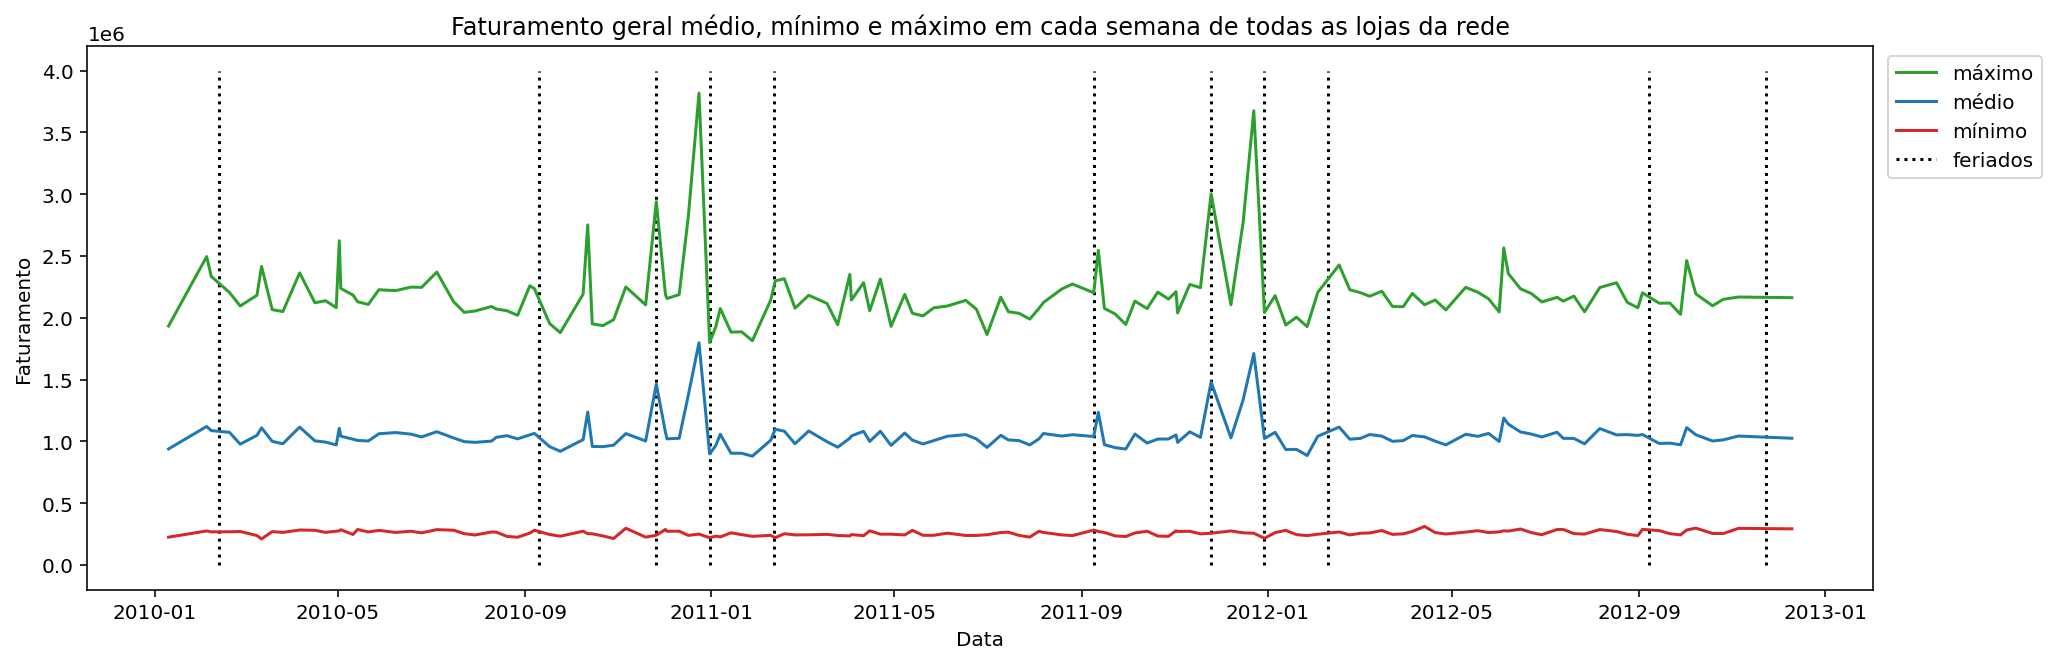

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(df_agg['Date'], df_agg['max'], label='máximo', color='tab:green')
plt.plot(df_agg['Date'], df_agg['mean'] , label='médio', color='tab:blue')
plt.plot(df_agg['Date'], df_agg['min'], label='mínimo', color='tab:red')
plt.gca().set(title='Faturamento geral médio, mínimo e máximo em cada semana de todas as lojas da rede', xlabel="Data", ylabel="Faturamento")

dates = [
    datetime(2010, 2, 12),
    datetime(2010, 9, 10),
    datetime(2010, 11, 26),
    datetime(2010, 12, 31),
    datetime(2011, 2, 11),
    datetime(2011, 9, 9),
    datetime(2011, 11, 25),
    datetime(2011, 12, 30),
    datetime(2012, 2, 10),
    datetime(2012, 9, 7),
    datetime(2012, 11, 23),
]

#y10 = [0, 4000000]

plt.vlines(dates, 0, 4000000, linestyle = 'dotted', label='feriados')

#plt.plot_date(dates, y10, linestyle = 'dotted')

plt.legend(bbox_to_anchor = (1.10, 1))
plt.show()


#### 6.3 Extra: Gráficos de faturamento das 5 melhores lojas.

Como visto na seção 5.1, as 5 primeiras lojas com melhor faturamento médio são: 20, 4, 14, 13 e 2, respectivamente

In [ ]:
from functools import reduce
df_plot = df[['Store', 'Date', 'Weekly_Sales']].copy()

df_max = df_plot.groupby(['Store', 'Date']).max().reset_index()
df_max.rename(columns={"Weekly_Sales": "Weekly_Sales_Max"}, inplace = True)

df_min = df_plot.groupby(['Store', 'Date']).min().reset_index()
df_min.rename(columns={"Weekly_Sales": "Weekly_Sales_Min"}, inplace = True)

df_mean = df_plot.groupby(['Store', 'Date']).mean().reset_index()
df_mean.rename(columns={"Weekly_Sales": "Weekly_Sales_Mean"}, inplace = True)

data_frames = [df_max, df_min, df_mean]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Store', 'Date'],
                                            how='inner'), data_frames).fillna('void')

#df_merged

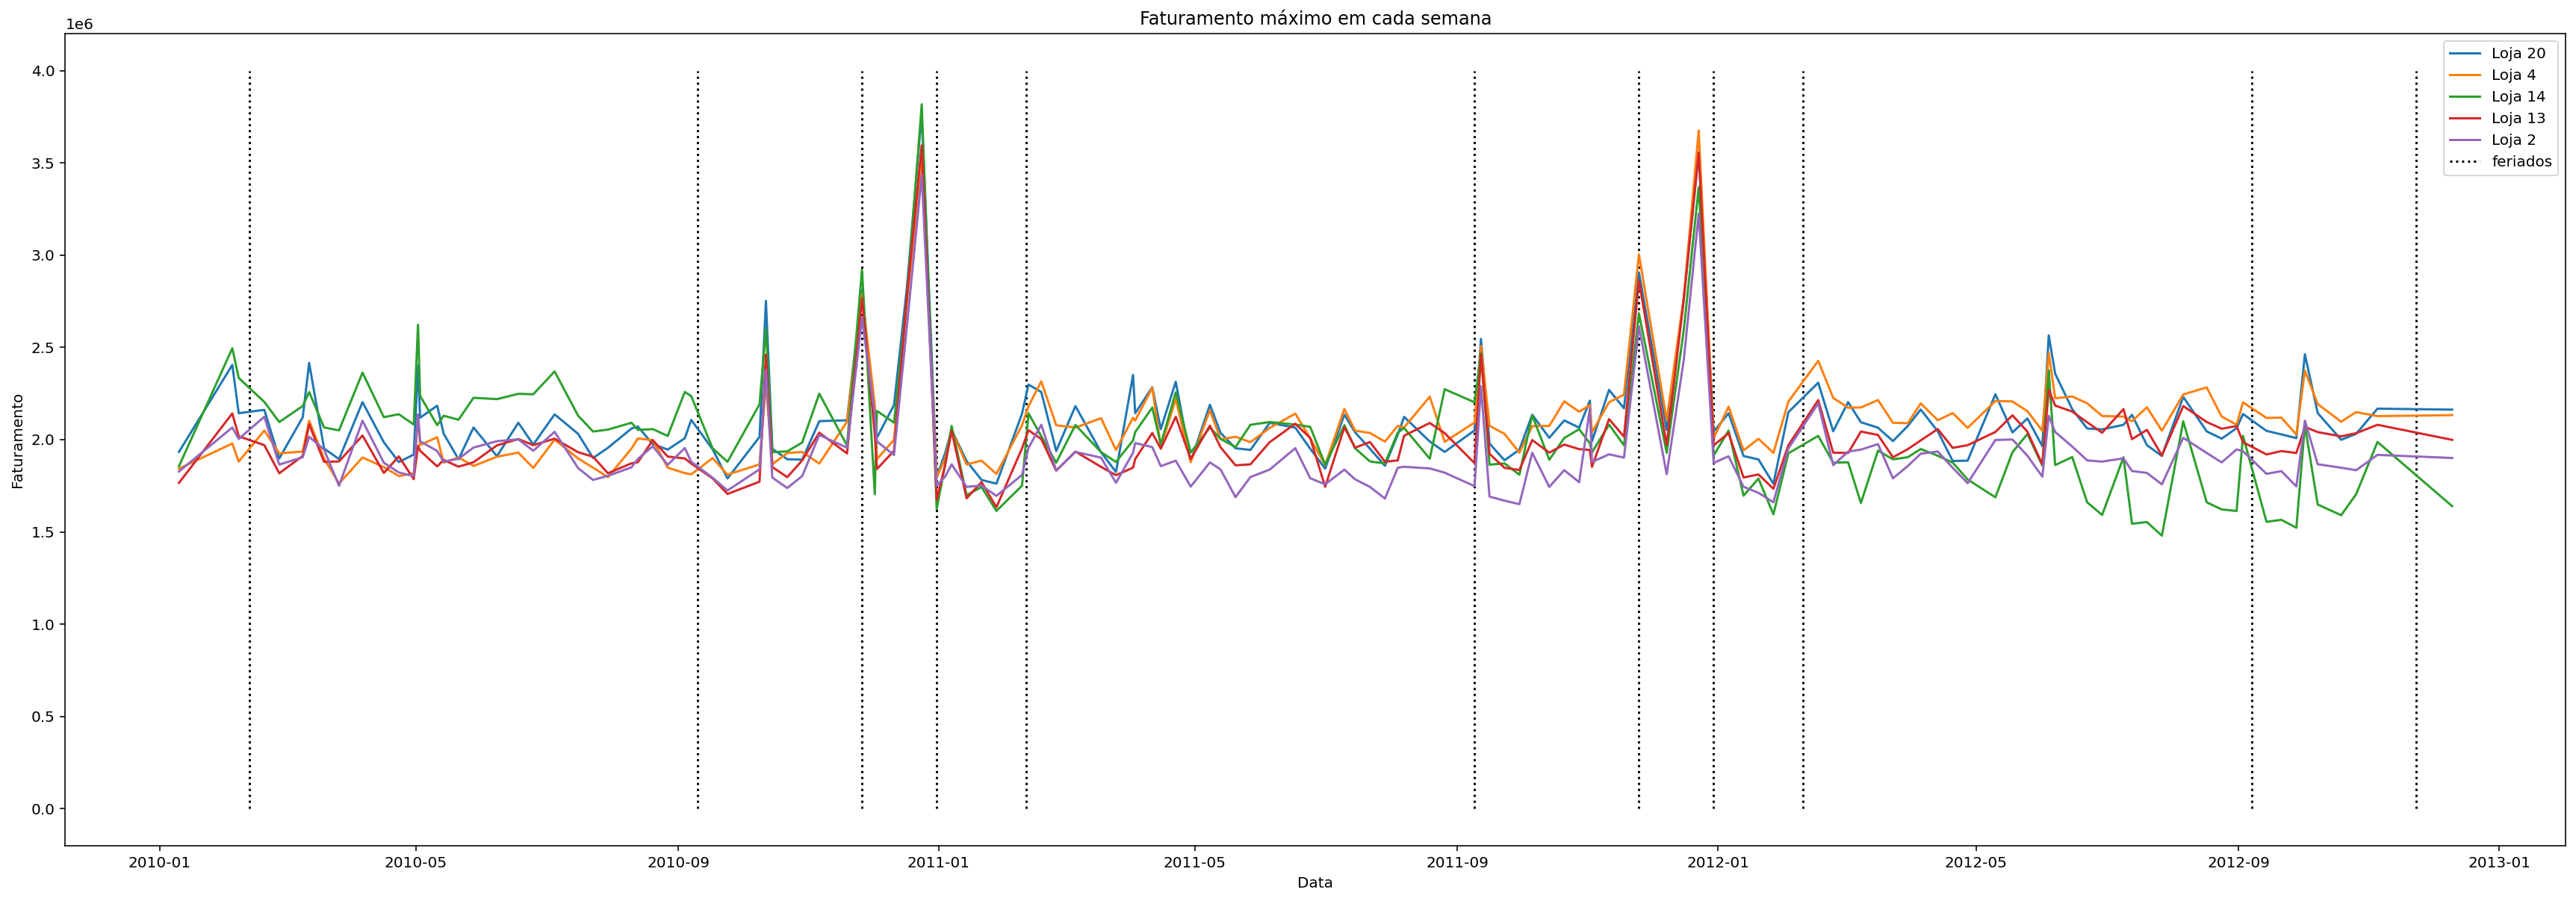

In [ ]:
plt.figure(figsize=(30,10))

df_merged_store20 = df_merged[df_merged['Store']==20]
df_merged_store4 = df_merged[df_merged['Store']==4]
df_merged_store14 = df_merged[df_merged['Store']==14]
df_merged_store13 = df_merged[df_merged['Store']==13]
df_merged_store2 = df_merged[df_merged['Store']==2]


plt.plot(df_merged_store20['Date'], df_merged_store20['Weekly_Sales_Max'], label='Loja 20')
plt.plot(df_merged_store4['Date'], df_merged_store4['Weekly_Sales_Max'], label='Loja 4')
plt.plot(df_merged_store14['Date'], df_merged_store14['Weekly_Sales_Max'], label='Loja 14')
plt.plot(df_merged_store13['Date'], df_merged_store13['Weekly_Sales_Max'], label='Loja 13')
plt.plot(df_merged_store2['Date'], df_merged_store2['Weekly_Sales_Max'], label='Loja 2')

dates = [
    datetime(2010, 2, 12),
    datetime(2010, 9, 10),
    datetime(2010, 11, 26),
    datetime(2010, 12, 31),
    datetime(2011, 2, 11),
    datetime(2011, 9, 9),
    datetime(2011, 11, 25),
    datetime(2011, 12, 30),
    datetime(2012, 2, 10),
    datetime(2012, 9, 7),
    datetime(2012, 11, 23),
]

#y10 = [0, 4000000]

plt.vlines(dates, 0, 4000000, linestyle = 'dotted', label='feriados')

plt.legend()
plt.gca().set(title='Faturamento em cada semana', xlabel="Data", ylabel="Faturamento");


### 7. Insights adicionais

Considerando que o faturamento das lojas top 5 é relativamente similar, decidimos explorar outros indicadores antes de definir a melhor loja deste subconjunto.

Nesta etapa avaliamos: os dados de **desemprego**, **CPI** e o **número de semanas em que cada loja foi líder em vendas**. 

Obs: CPI = Índice de preços ao consumidor.

#### 7.1. Gerando dataframes com valores médios, mínimos e máximos de desemprego e CPI por loja.

Conforme a tabela abaixo, a loja 4 apresenta os menores valores de desemprego.

In [ ]:
df_une = df.groupby('Store')['Unemployment'].agg({'max', 'mean', 'min'}).reset_index()
df_une.head()

,Store,min,max,mean
0,1,6.573,8.106,7.610420
1,2,6.170,8.324,7.623846
2,3,6.034,7.574,7.176986
3,4,3.879,8.623,5.964692
4,5,5.422,6.768,6.295406


A loja 4 também apresenta os menores valores de CPI.

In [ ]:
df_cpi = df.groupby('Store')['CPI'].agg({'max', 'mean', 'min'}).reset_index()
df_cpi.head()

,Store,min,max,mean
0,1,210.337426,223.444251,215.996892
1,2,209.998458,223.078337,215.646311
2,3,213.619614,226.987364,219.391531
3,4,126.064000,131.193097,128.679669
4,5,210.887277,224.037814,216.565581


Conforme explicado no item 4.1, o desemprego e CPI se correlacionam negativamente com o Faturamento. 

Portanto, lojas com menores valores para estas métricas podem ser consideradas mais promissoras.

Nesse sentido destaca-se a loja 4, com menores desempregos e CPI dentre as lojas com maiores faturamentos.

#### 7.2 Calculando a quantidade de semanas em que cada loja foi líder em vendas

In [ ]:
count4 = 0
count13 = 0
count14 = 0
count20 = 0

for ft, f4, f13, f14, f20 in zip(df_agg['max'], y4, y13, y14, y20):  
  if ft == f4:
    count4 +=1
  if ft == f13:
    count13 += 1
  if ft == f14:
    count14 += 1
  if ft == f20:
    count20 += 1

print('Nº de semanas em que as lojas foram líderes em faturamento:\n')

print('Loja 4: {} semanas'.format(count4),
      'Loja 14: {} semanas'.format(count14),
      'Loja 20: {} semanas'.format(count20),      
      'Loja 13: {} semana'.format(count13),
      sep="\n")

Nº de semanas em que as lojas foram líderes em faturamento:

Loja 4: 60 semanas
Loja 14: 44 semanas
Loja 20: 37 semanas
Loja 13: 1 semana


Nesta análise, a loja 4 também se destacou, sendo líder em vendas em ~42% das semanas avaliadas.

### 8. Avaliação final: Pensando na expansão de uma das lojas, que loja você escolheria e o por quê?

#### 8.1 Resposta

Baseados nesta exploração, concluímos que a **loja 4** seria a loja mais adequada para investimento, pois apresentou **faturamento total** muito semelhante a loja 20 (2º lugar, o que é muito bom), porém tem **menores índices de desemprego** e **índice de preço ao consumidor**. 

A partir do gráfico de faturamento, a loja 4 aparentemente **vem aumentando seu faturamento** ao longo do tempo (curva azul), gerando **bons indicadores de crescimento**. Diferentemente da loja 14, que apresenta claro comportamento de queda.

Corroborando com os dados anteriores, foi verificado que a loja 4 apresentou liderança com folga em **máximo de faturamento semanal**, das 143 semanas analisadas, ela **liderou em 60 semanas (~42%)**.

Diante desse contexto, **recomendamos a loja 4 para investimento.**

#### 8.2 Próximos passos

Verificar se é possível a obtenção de colunas: tamanho das lojas; localização das lojas; fluxo de pessoas e custos, para fornecer melhor sugestão estratégica, uma vez que o tamanho e localização das lojas nos informaria melhor sobre a capacidade de expansão desta unidade, os custos dariam melhor noção de lucro líquido e o fluxo de pessoas poderia indicar a necessidade mais urgente de um espaço físico maior.